In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from itertools import combinations

In [3]:
header = ['Neighbourhood Distance', 'Embedding Size', 'Training Epochs', 'Context Window', 'Max. NGram Length']
names = header + [str(x) for x in range(25)]
df = pd.read_csv('../experiments/LinkPredExperiments.csv', sep=' ', header=None, names=names)

In [4]:
df["ExperimentMean"] = df.iloc[:, -25:].mean(axis=1)
df["ExperimentStdDev"] = df.iloc[:, -25:].std(axis=1)

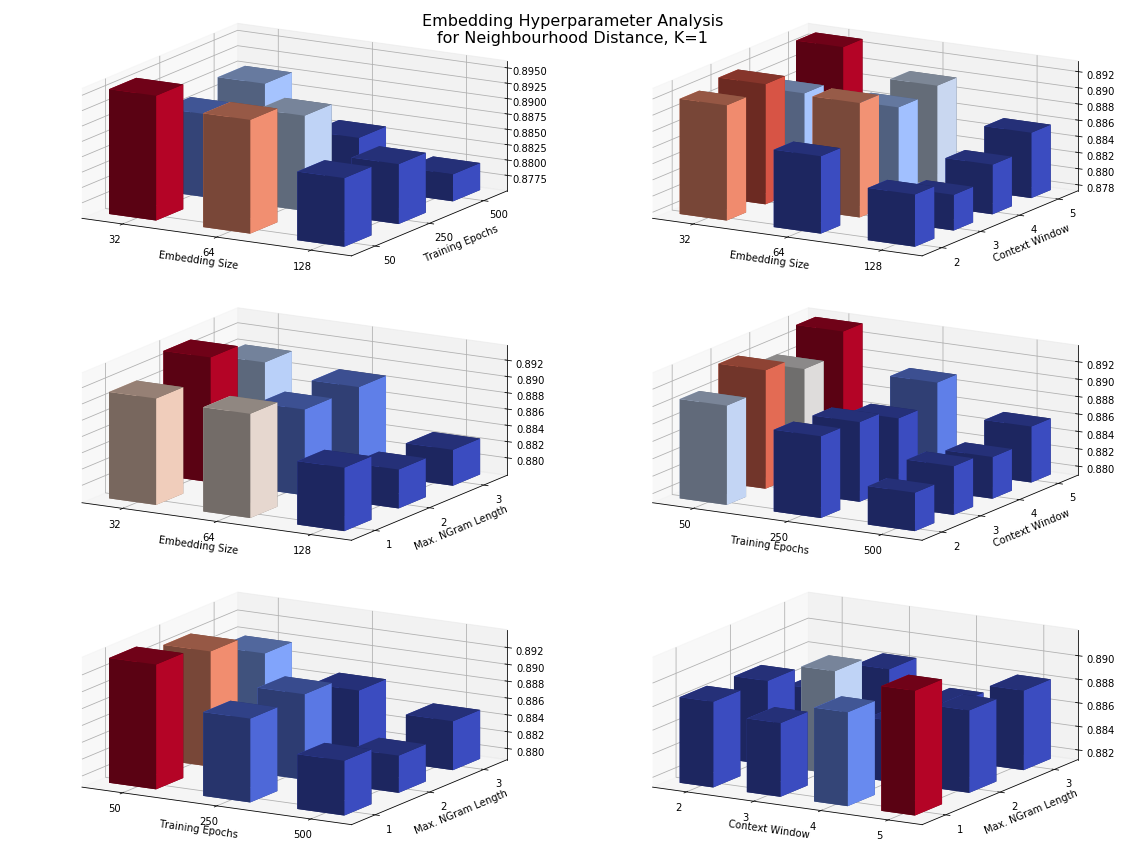

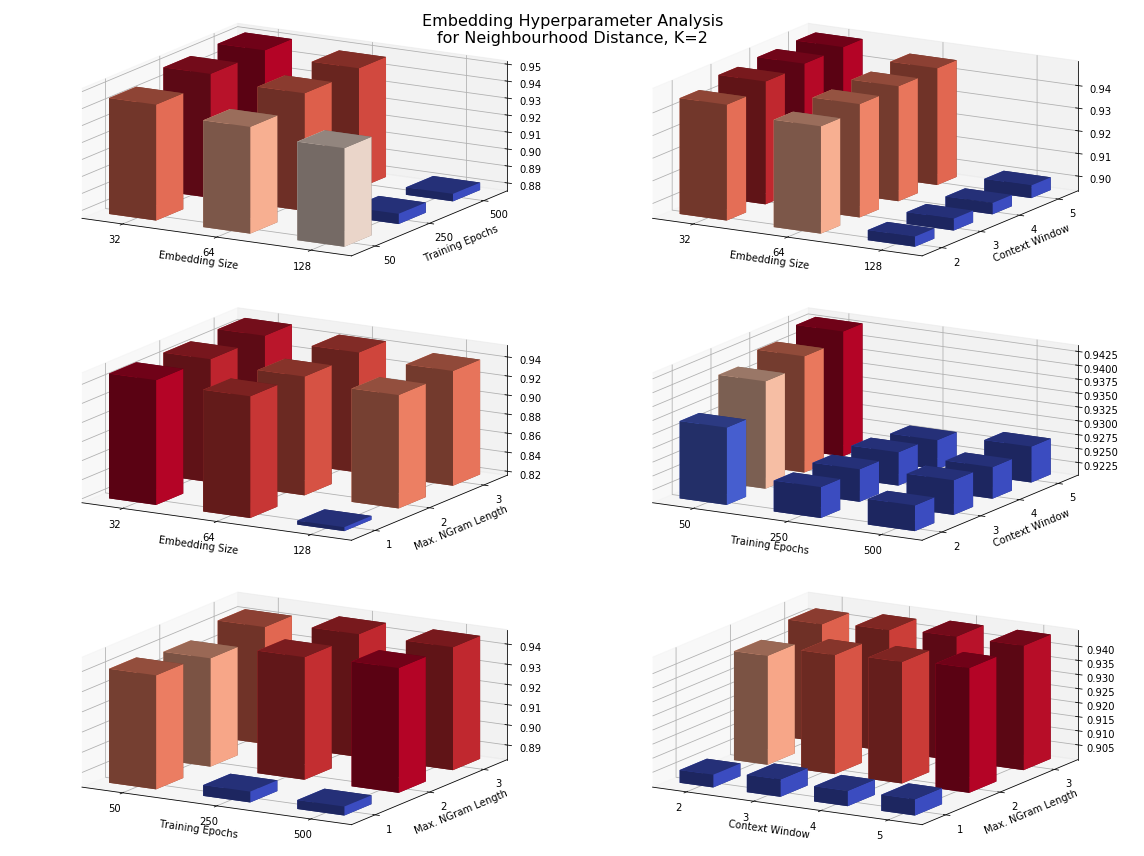

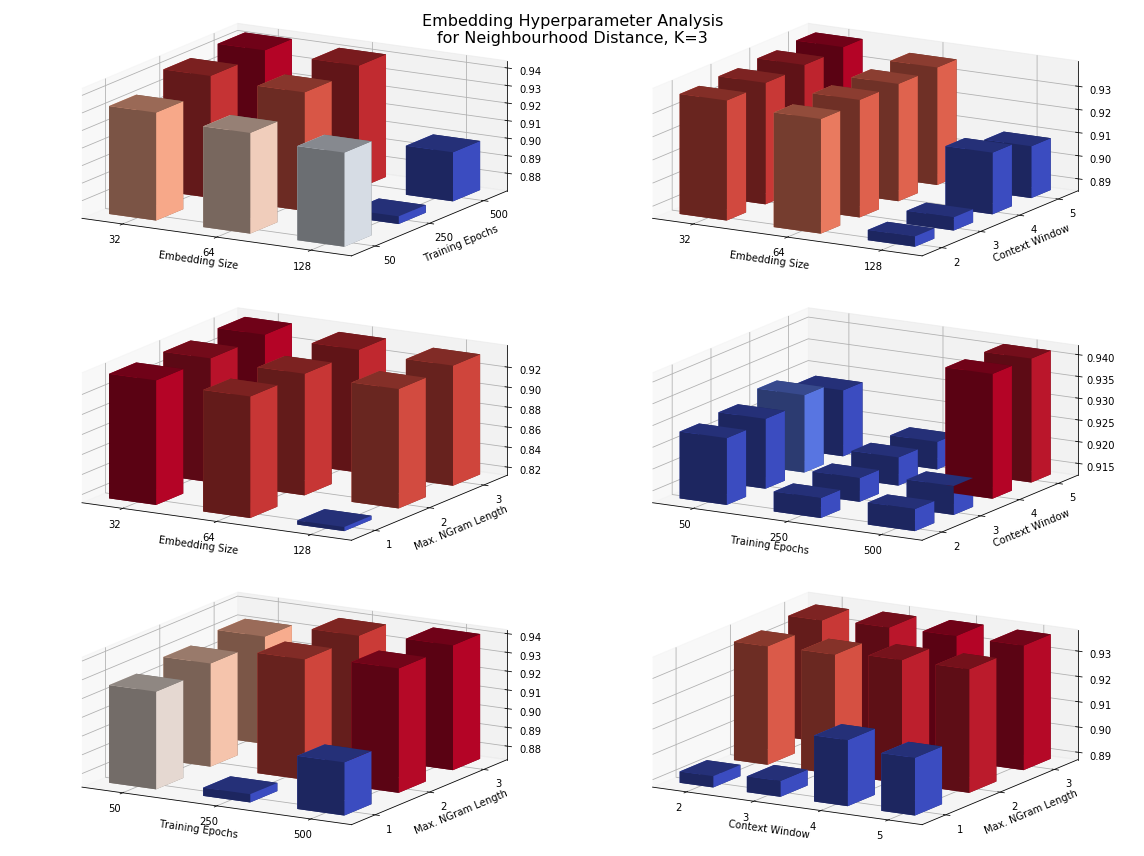

In [172]:
from mpl_toolkits.mplot3d import Axes3D  # noqa: F401 unused import
cmap = plt.get_cmap('coolwarm')

for K in df['Neighbourhood Distance'].unique():
    K_df = df[df["Neighbourhood Distance"] == K]
    fig = plt.figure(figsize=(16, 12))
    fig.suptitle('Embedding Hyperparameter Analysis\nfor Neighbourhood Distance, K={}'.format(K), fontsize=16)
    for i, t in enumerate(combinations(header[1:], 2)):
        t_x, t_y = t
        grouping = K_df.groupby(t)["ExperimentMean"].mean().reset_index()
        
        # Get the values 
        ax = fig.add_subplot(3, 2, i + 1, projection='3d', proj_type='ortho')
        x = grouping[t_x]
        y = grouping[t_y]
        x_norm = {v: i for i, v in enumerate(x.unique())}
        y_norm = {v: i for i, v in enumerate(y.unique())}
        x_indices = np.asarray([x_norm[v] for v in x.values])
        y_indices = np.asarray([y_norm[v] for v in y.values])
        x_pos = np.arange(0, len(x_norm))
        y_pos = np.arange(0, len(y_norm))
        
        # Prepare the ticks
        ax.w_xaxis.set_label_text(t_x)
        ax.w_xaxis.set_ticks(x_pos + 0.25)
        ax.w_xaxis.set_ticklabels([str(v) for v in x.unique()])
        ax.w_yaxis.set_label_text(t_y)
        ax.w_yaxis.set_ticks(y_pos + 0.25)
        ax.w_yaxis.set_ticklabels([str(v) for v in y.unique()])
        
        # Normalize the range of the scores
        scores = grouping["ExperimentMean"].values
        norm_scores = 2 * (scores - scores.min()) / (scores.max() - scores.min()) - 1
        colors = [cmap(v) for v in norm_scores]
        
        # Plot the values
        score_bottom = scores.min() * 0.995
        top = scores - score_bottom
        bottom = np.zeros_like(top) + score_bottom
        width = 0.5
        depth = 0.5
        ax.bar3d(x_indices, y_indices, bottom, width, depth, top, shade=True, color=colors)
    fig.tight_layout()

In [8]:
df.sort_values(by="ExperimentMean", ascending=False)

,Neighbourhood Distance,Embedding Size,Training Epochs,Context Window,Max. NGram Length,0,1,2,3,4,...,17,18,19,20,21,22,23,24,ExperimentMean,ExperimentStdDev
174,2,32,500,4,1,0.951782,0.951757,0.954747,0.951828,0.952019,...,0.953030,0.954458,0.952356,0.954955,0.951197,0.955493,0.954184,0.953460,0.953102,0.001392
177,2,32,500,5,1,0.951867,0.954495,0.953563,0.951682,0.954623,...,0.953168,0.952104,0.951369,0.954855,0.952121,0.952458,0.952658,0.952081,0.952807,0.001306
171,2,32,500,3,1,0.952740,0.951057,0.952695,0.955302,0.951849,...,0.953462,0.952165,0.949431,0.951648,0.952273,0.953799,0.953901,0.952258,0.952496,0.001554
153,2,32,250,5,1,0.954966,0.954659,0.955065,0.951915,0.952778,...,0.953134,0.951968,0.953390,0.952557,0.953389,0.950970,0.953872,0.952458,0.952203,0.001534
150,2,32,250,4,1,0.953279,0.954373,0.952449,0.952645,0.953774,...,0.953142,0.950693,0.950925,0.952135,0.951121,0.951853,0.950910,0.952356,0.952194,0.001214
213,2,64,500,5,1,0.951031,0.952186,0.950929,0.953541,0.951161,...,0.953420,0.952459,0.955741,0.952179,0.953593,0.951313,0.950797,0.948641,0.952082,0.001489
147,2,32,250,3,1,0.948943,0.952860,0.955014,0.950960,0.951722,...,0.951108,0.952429,0.950085,0.951199,0.949887,0.950188,0.953345,0.950824,0.951755,0.001749
207,2,64,500,3,1,0.949388,0.951852,0.955837,0.953980,0.953279,...,0.950784,0.954161,0.951934,0.949481,0.952616,0.952239,0.952003,0.952001,0.951660,0.001871
175,2,32,500,4,2,0.949371,0.950690,0.953081,0.951651,0.951279,...,0.954002,0.948930,0.951053,0.952688,0.952993,0.949763,0.951230,0.951020,0.951564,0.001325
210,2,64,500,4,1,0.952790,0.946013,0.949605,0.953332,0.953404,...,0.951175,0.949765,0.952973,0.950867,0.948339,0.950741,0.953191,0.951414,0.951097,0.001888
